In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from PIL import Image
import cv2
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Conv3D,Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD

print("Hello")
images_path = "data/covid/images/"

Hello


In [8]:
metadata = pd.read_csv("data/covid/metadata.csv")
with open('data/covid/annotations/imageannotation_ai_lung_bounding_boxes.json', 'r') as f:
    image_annotations = json.load(f)
print(image_annotations["images"][4])

{'license': 1, 'file_name': 'nejmc2001573_f1a.jpeg', 'height': 1272, 'width': 1645, 'id': 5, 'metadata': {'patientid': '4', 'offset': '0', 'sex': 'F', 'age': '52', 'finding': 'COVID-19', 'view': 'PA', 'modality': 'X-ray', 'date': 'January 25, 2020', 'location': 'Changhua Christian Hospital, Changhua City, Taiwan', 'doi': '10.1056/NEJMc2001573', 'url': 'https://www.nejm.org/doi/full/10.1056/NEJMc2001573', 'clinical notes': 'diffuse infiltrates in the bilateral lower lungs'}}


[1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Image: 0/167


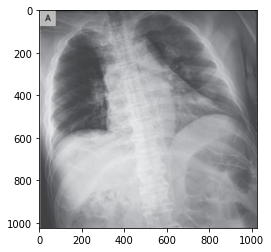

Image: 1/167


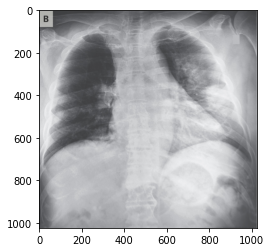

Image: 2/167


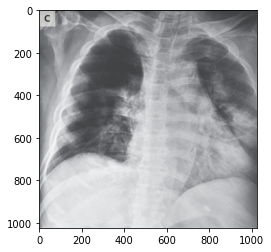

Image: 3/167


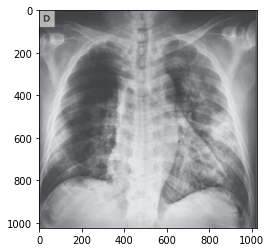

Image: 4/167


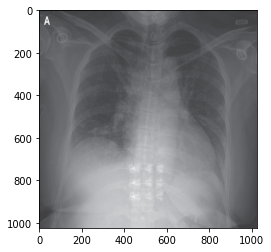

Image: 5/167


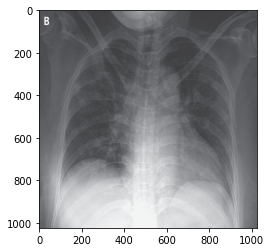

Image: 6/167


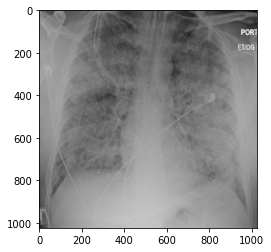

Image: 7/167


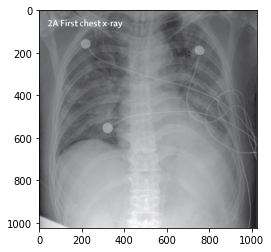

Image: 8/167


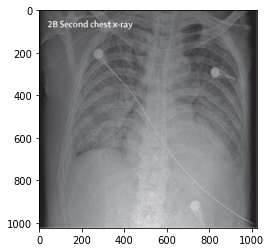

Image: 9/167


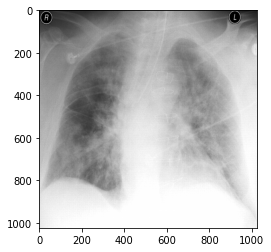

Image: 10/167


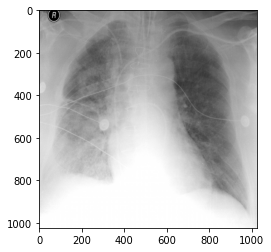

Image: 11/167


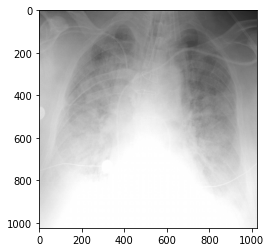

Image: 12/167


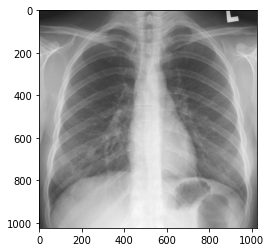

Image: 13/167


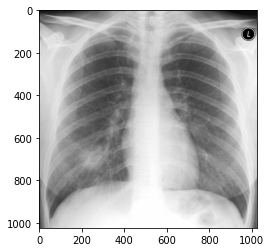

Image: 14/167


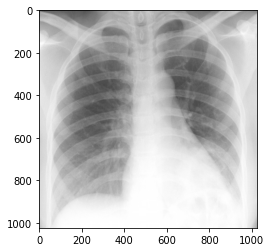

Image: 15/167


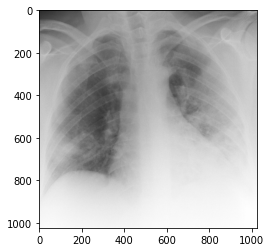

Image: 16/167


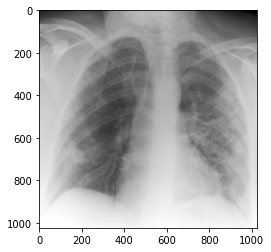

Image: 17/167


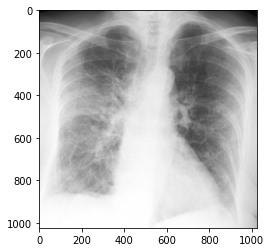

Image: 18/167


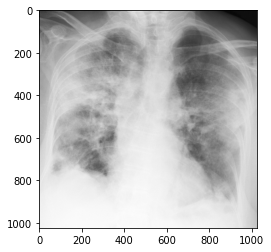

Image: 19/167


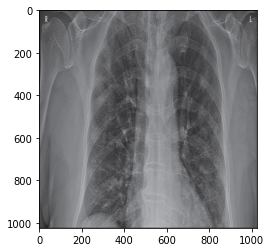

Image: 20/167


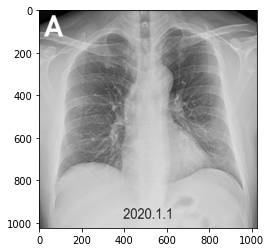

Image: 21/167


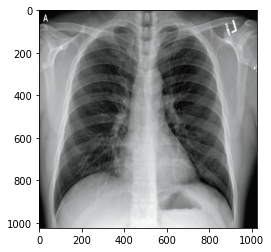

Image: 22/167


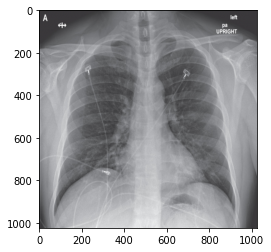

Image: 23/167


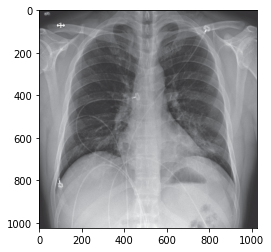

Image: 24/167


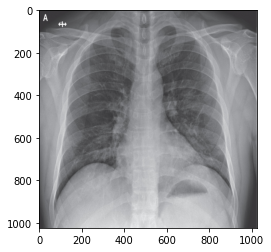

Image: 25/167


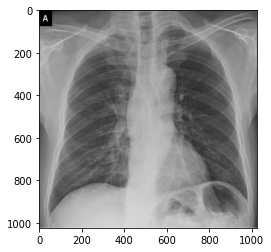

Image: 26/167


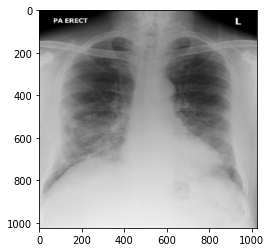

Image: 27/167


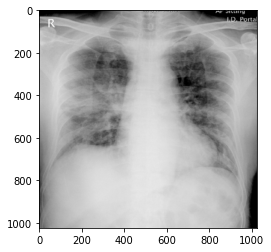

Image: 28/167


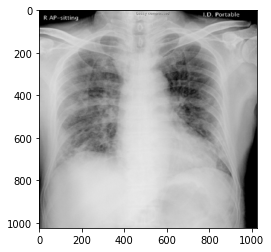

Image: 29/167


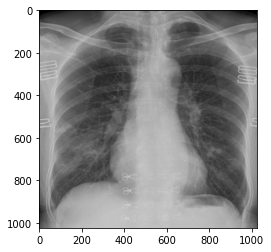

Image: 30/167


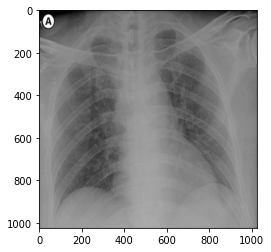

Image: 31/167


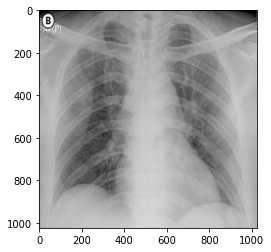

Image: 32/167


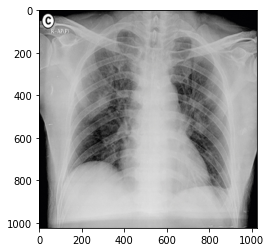

Image: 33/167


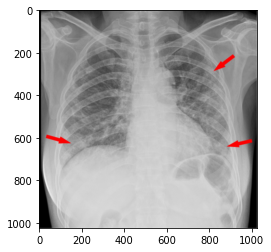

Image: 34/167


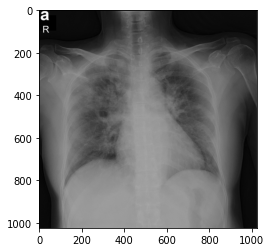

Image: 35/167


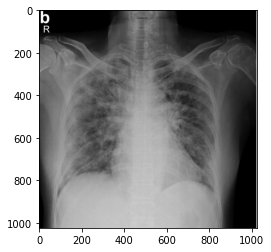

Image: 36/167


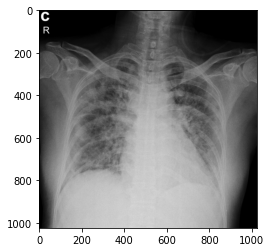

Image: 37/167


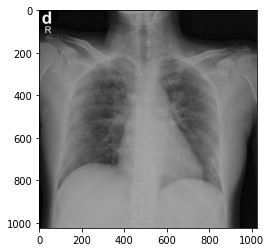

Image: 38/167


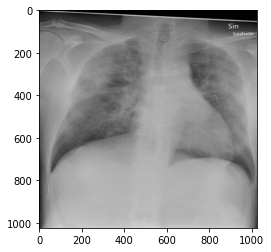

Image: 39/167


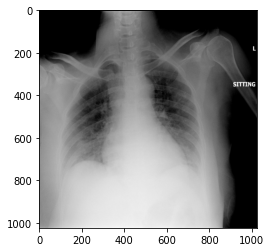

Image: 40/167


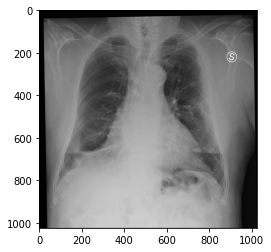

Image: 41/167


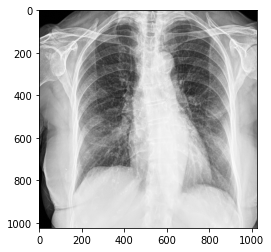

Image: 42/167


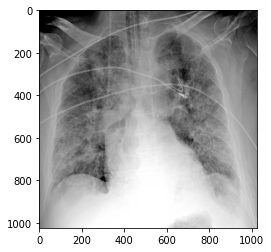

Image: 43/167


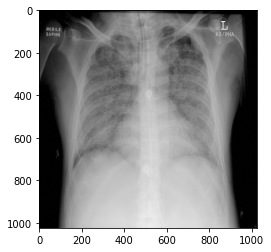

Image: 44/167


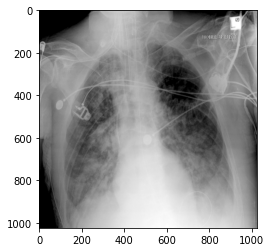

Image: 45/167


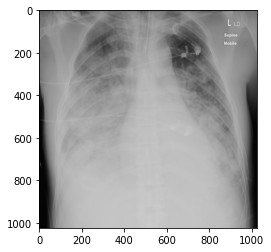

Image: 46/167


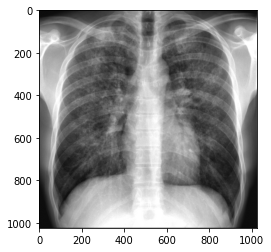

Image: 47/167


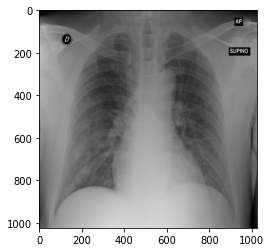

Image: 48/167


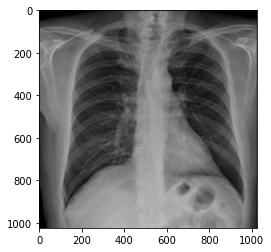

Image: 49/167


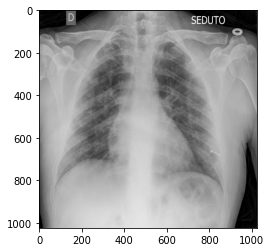

Image: 50/167


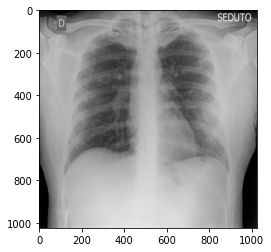

Image: 51/167


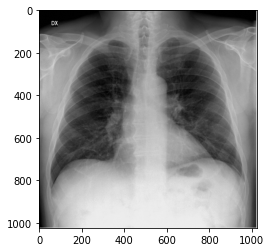

Image: 52/167


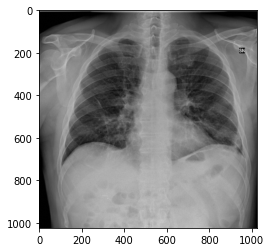

Image: 53/167


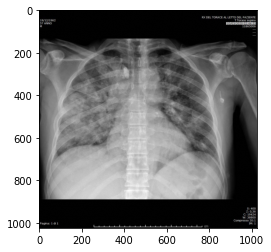

Image: 54/167


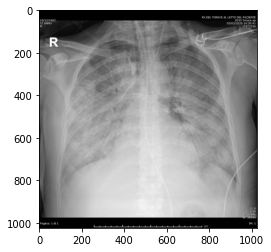

Image: 55/167


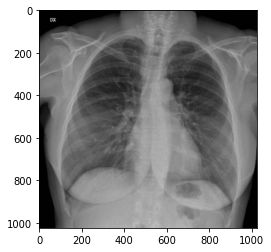

Image: 56/167


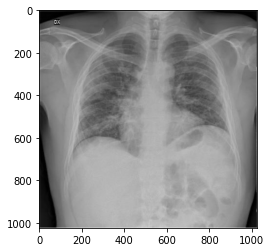

Image: 57/167


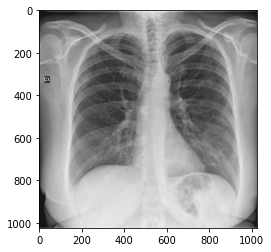

Image: 58/167


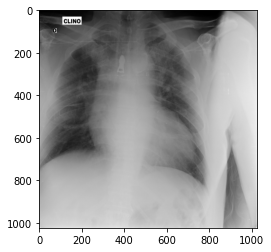

Image: 59/167


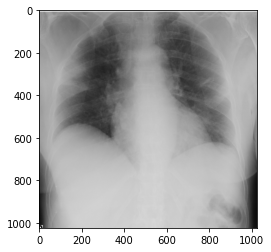

Image: 60/167


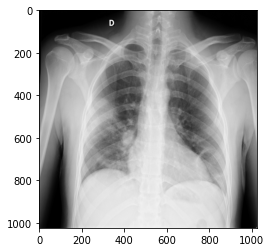

Image: 61/167


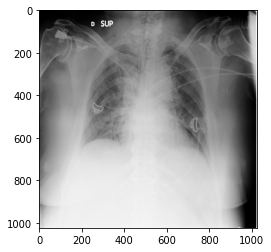

Image: 62/167


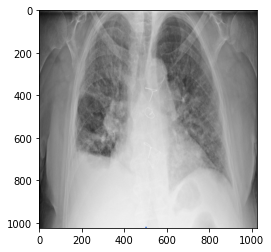

Image: 63/167


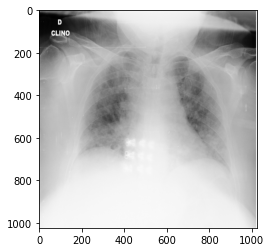

Image: 64/167


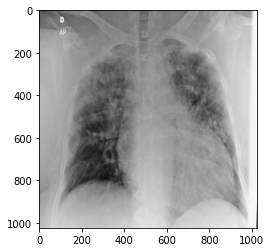

Image: 65/167


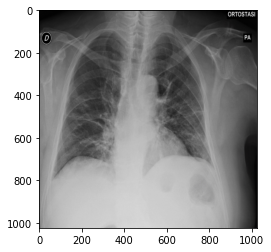

Image: 66/167


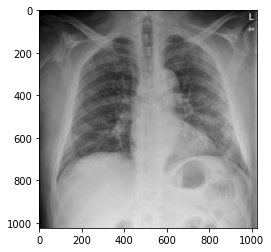

Image: 67/167


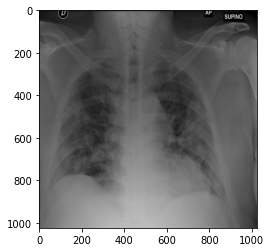

Image: 68/167


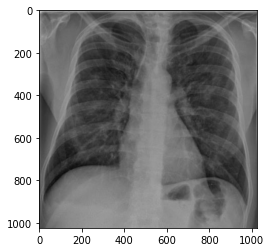

Image: 69/167


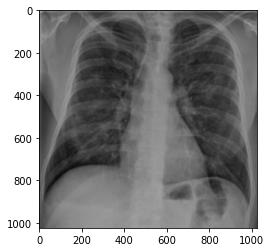

Image: 70/167


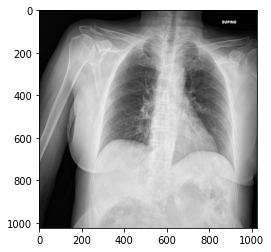

Image: 71/167


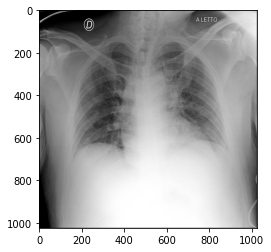

Image: 72/167


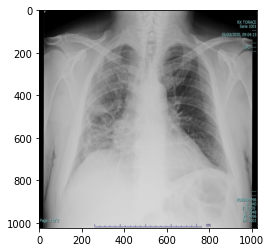

Image: 73/167


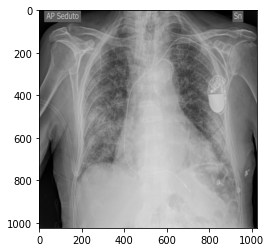

Image: 74/167


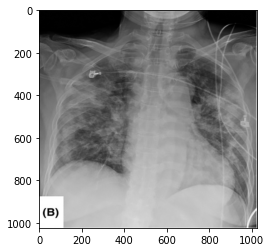

Image: 75/167


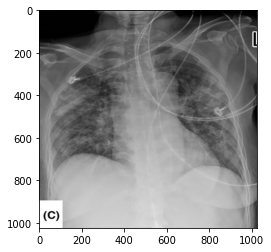

Image: 76/167


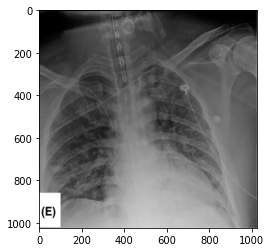

Image: 77/167


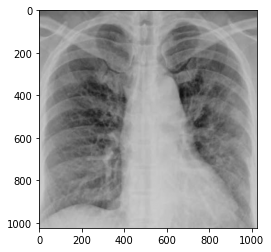

Image: 78/167


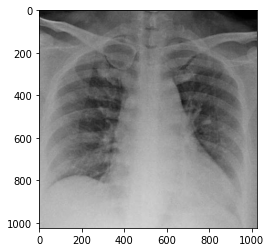

Image: 79/167


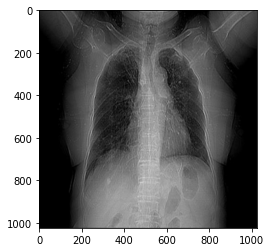

Image: 80/167


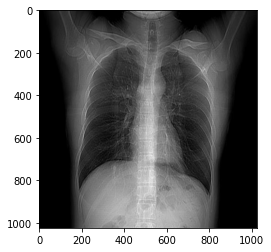

Image: 81/167


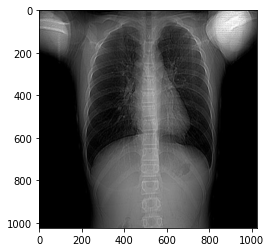

Image: 82/167


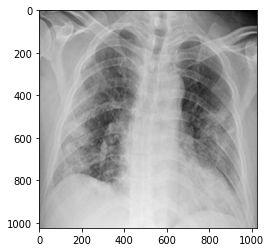

Image: 83/167


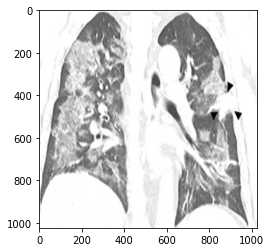

Image: 84/167


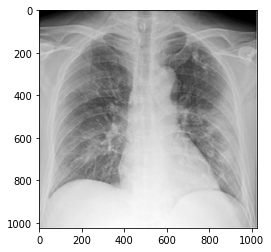

Image: 85/167


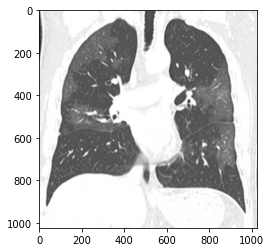

Image: 86/167


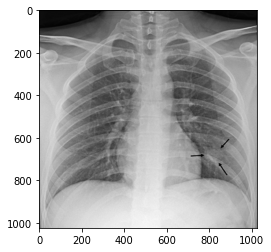

Image: 87/167


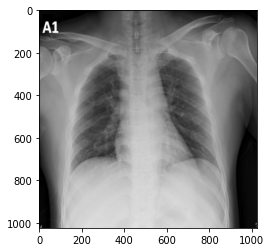

Image: 88/167


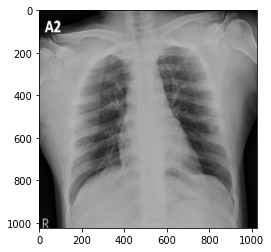

Image: 89/167


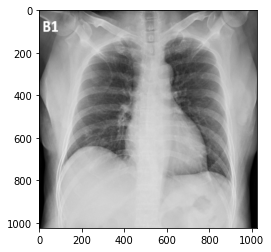

Image: 90/167


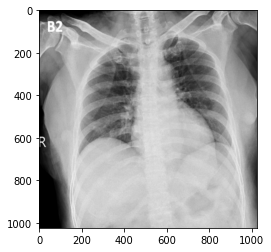

Image: 91/167


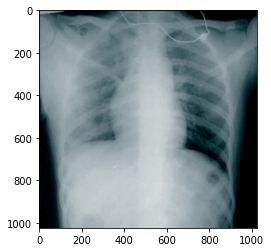

Image: 92/167


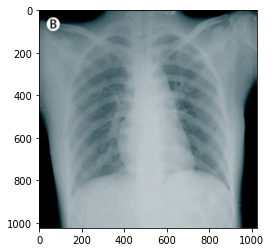

Image: 93/167


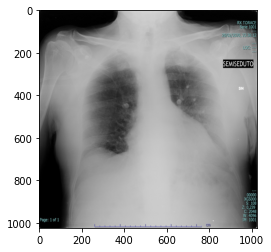

Image: 94/167


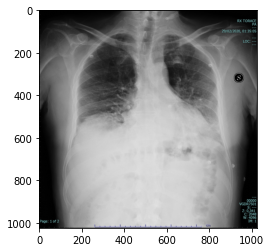

Image: 95/167


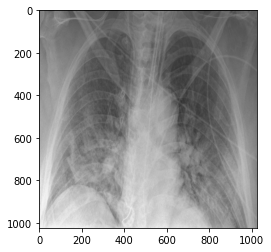

Image: 96/167


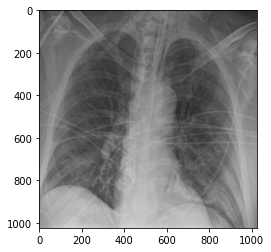

Image: 97/167


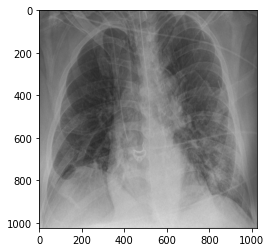

Image: 98/167


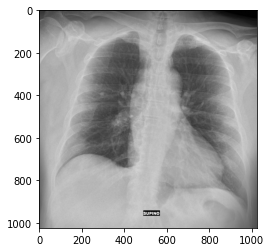

Image: 99/167


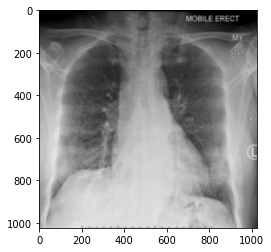

Image: 100/167


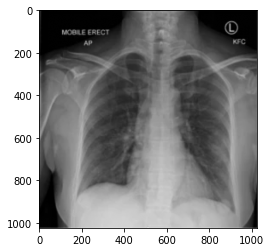

Image: 101/167


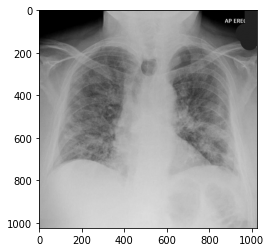

Image: 102/167


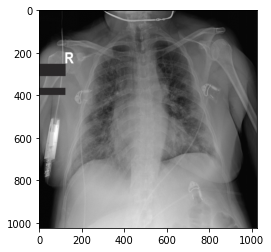

Image: 103/167


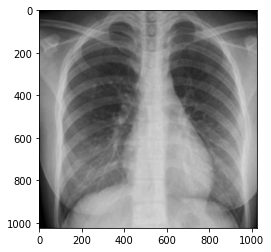

Image: 104/167


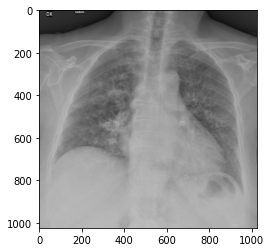

Image: 105/167


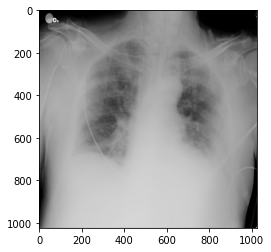

Image: 106/167


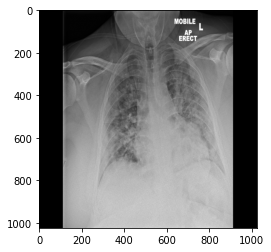

Image: 107/167


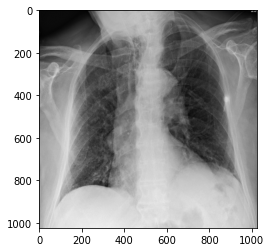

Image: 108/167


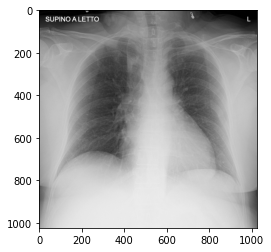

Image: 109/167


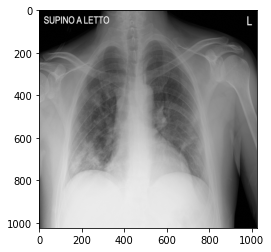

Image: 110/167


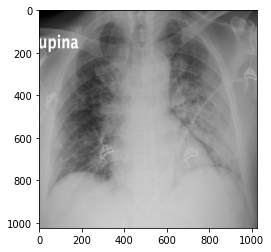

Image: 111/167


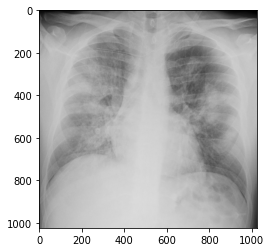

Image: 112/167


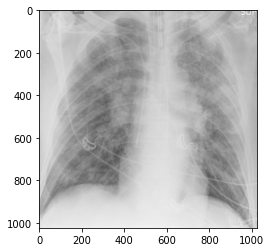

Image: 113/167


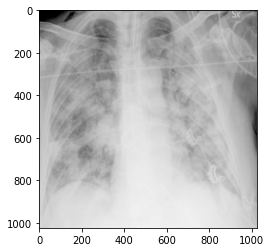

Image: 114/167


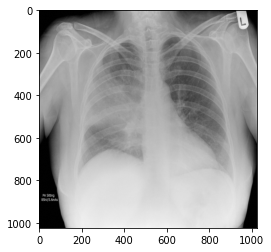

Image: 115/167


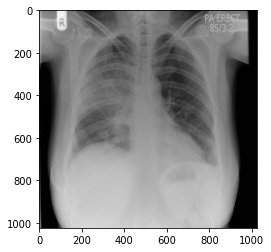

Image: 116/167


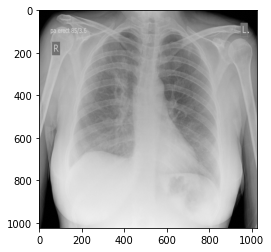

Image: 117/167


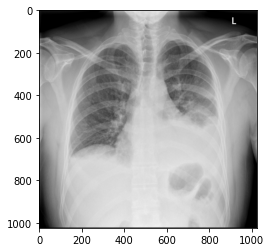

Image: 118/167


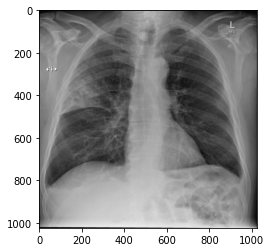

Image: 119/167


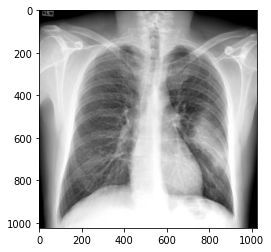

Image: 120/167


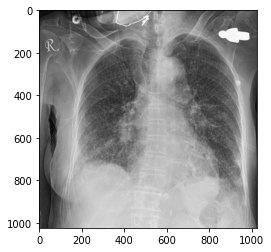

Image: 121/167


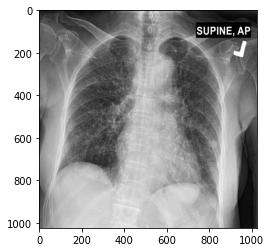

Image: 122/167


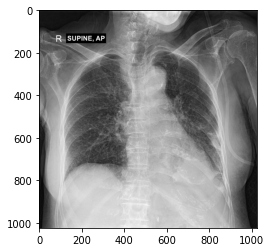

Image: 123/167


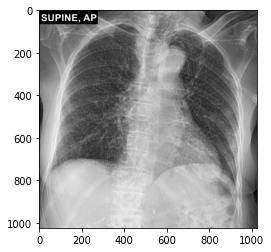

Image: 124/167


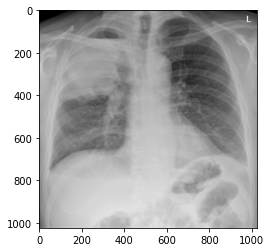

Image: 125/167


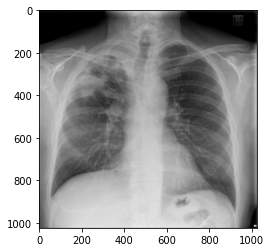

Image: 126/167


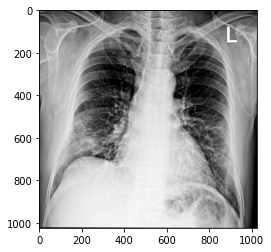

Image: 127/167


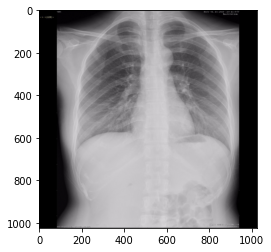

Image: 128/167


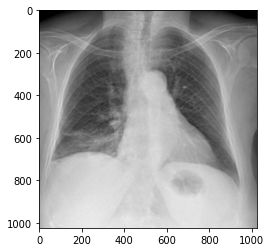

Image: 129/167


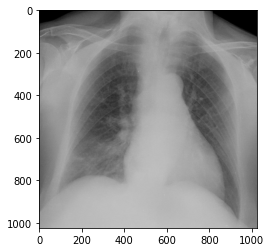

Image: 130/167


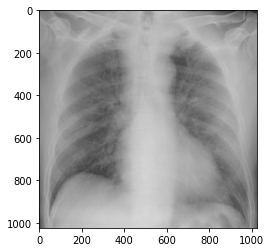

Image: 131/167


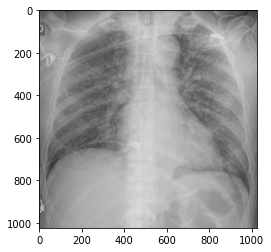

Image: 132/167


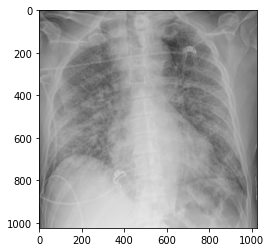

Image: 133/167


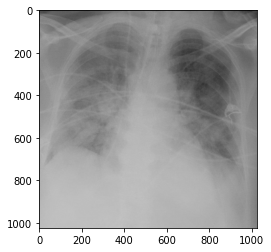

Image: 134/167


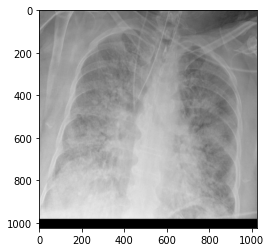

Image: 135/167


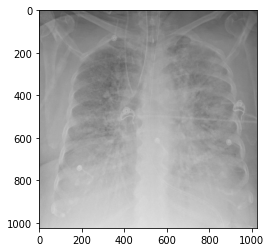

Image: 136/167


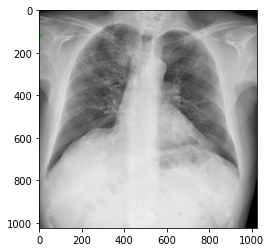

Image: 137/167


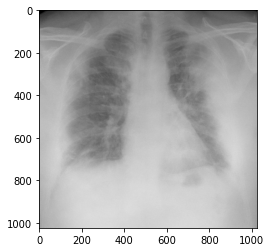

Image: 138/167


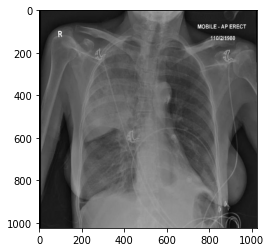

Image: 139/167


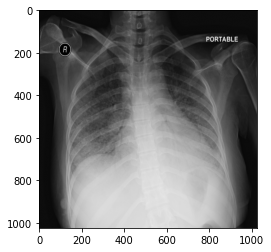

Image: 140/167


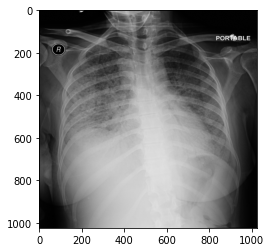

Image: 141/167


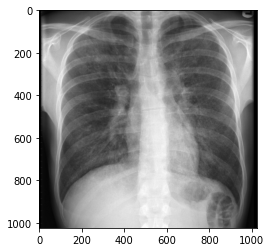

Image: 142/167


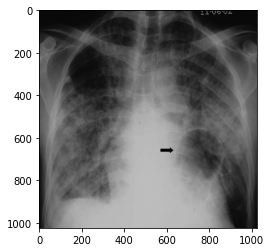

Image: 143/167


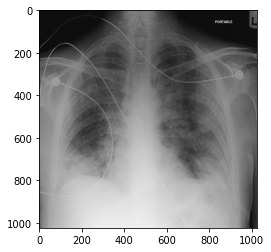

Image: 144/167


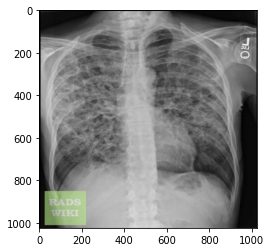

Image: 145/167


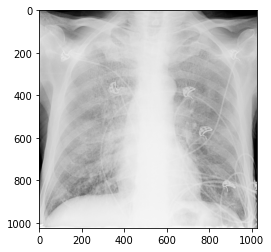

Image: 146/167


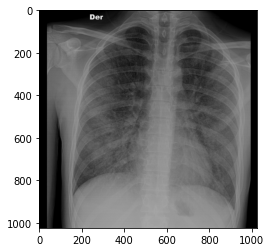

Image: 147/167


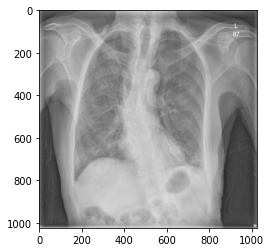

Image: 148/167


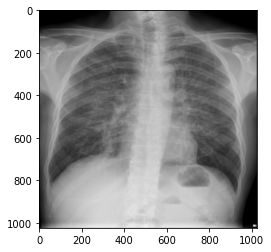

Image: 149/167


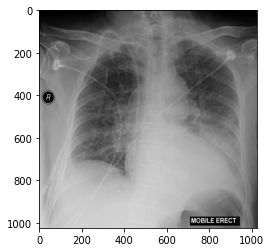

Image: 150/167


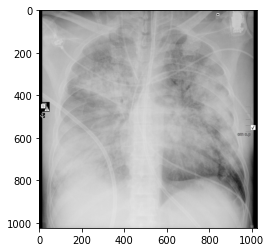

Image: 151/167


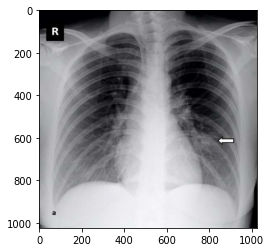

Image: 152/167


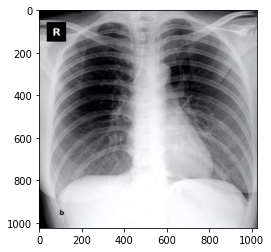

Image: 153/167


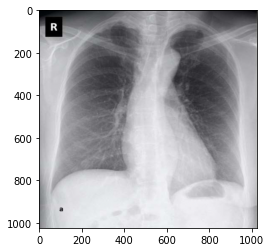

Image: 154/167


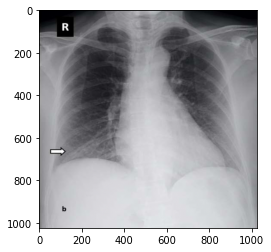

Image: 155/167


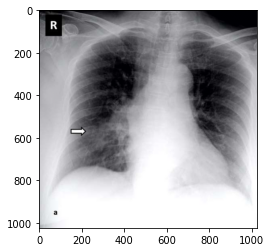

Image: 156/167


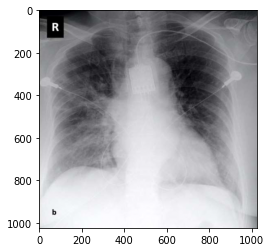

Image: 157/167


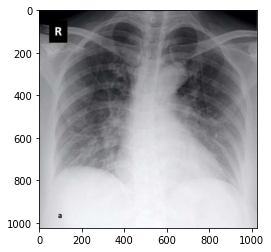

Image: 158/167


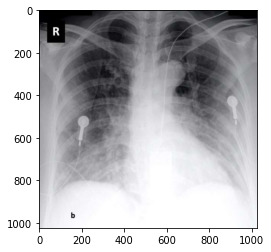

Image: 159/167


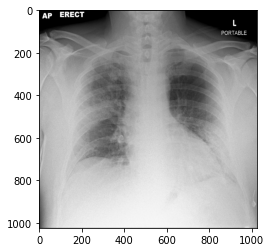

Image: 160/167


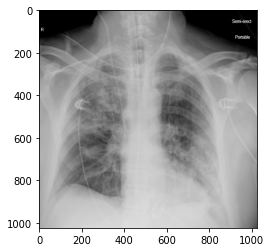

Image: 161/167


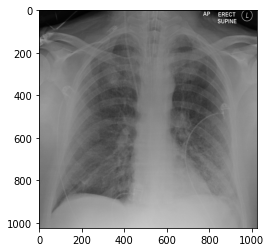

Image: 162/167


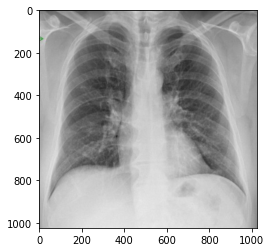

Image: 163/167


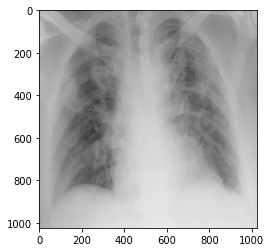

Image: 164/167


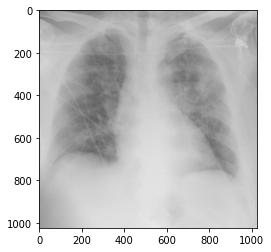

Image: 165/167


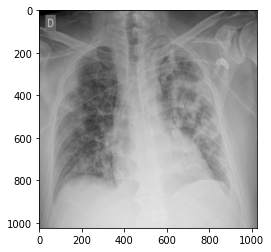

Image: 166/167


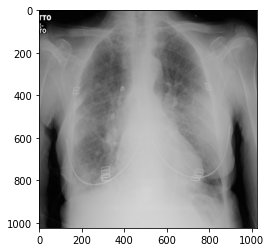

Finished


In [4]:
# Data preprocessing
labels = []
min_height = 10000000
min_width = 100000000
max_height = 0
max_width = 0
imgs = []
for img_data in image_annotations["images"]:
#     turn each image into numpy array
#     create list of labels
    pic_name = img_data['file_name']
    img_numpy = cv2.imread(images_path+pic_name)
    img_numpy = cv2.cvtColor(img_numpy, cv2.COLOR_RGB2BGR)
    imgs.append(img_numpy)
#     print(img_numpy.shape)
#     plt.imshow(img_numpy)
#     plt.show()
    if img_data['metadata']['finding'].find('COVID-19') != -1:
        labels.append(1)
#         print(img_data['metadata']['finding'])
    else:
#         print(img_data['metadata']['finding'])
        labels.append(-1)
print(labels)
dim = (1024, 1024)
vectorise_standardise = np.vectorize(lambda i: i/255)
resized_imgs = []
i = 0
for img in imgs:
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = vectorise_standardise(img)
    resized_imgs.append(img)
    print("Image: {}/{}".format(i, len(imgs)))
    i+=1
    plt.imshow(img)
    plt.show()

print("Finished")


In [9]:
epochs = 5
batch_size = 128
lr = 0.2
kernel_size = (3, 3, 3)
input_shape = (1024, 1024, 3)



In [11]:
# In here we will do our CNN work
model = Sequential()
model.add(Conv3D(64,kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer="adam" , metrics=['accuracy'])
model_data = model.fit(resized_imgs, labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

ValueError: Input 0 is incompatible with layer conv3d_2: expected ndim=5, found ndim=4